In [1]:
#pip install matplotlib

In [2]:
import sys
import tensorflow as tf
import numpy as np

print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

2024-11-27 10:13:35.975468: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 10:13:36.024560: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 10:13:36.025337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-27 10:13:36.837160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Python version: 3.9.18 (main, Sep 11 2023, 13:21:18) 
[GCC 11.2.0]
TensorFlow version: 2.12.1
NumPy version: 1.24.3


In [3]:
from __future__ import print_function
from sklearn.datasets import fetch_openml
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD, Adam

from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [4]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

In [5]:
# split dataset into train and test data
(x_train, y_train), (x_test, y_test)=mnist.load_data()

if K.image_data_format == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'train samples')

# convert labels into matrix of one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test[0])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 train samples
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [6]:
#      Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(40, activation='relu'))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

#model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation (Activation)     (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [7]:
# training - obucavanje
model.fit(x_train, y_train, epochs=2,batch_size=1, verbose=1, validation_data=(x_test, y_test))

Epoch 1/2
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1032 - accuracy: 0.9690 - val_loss: 0.0453 - val_accuracy: 0.9852
Epoch 2/2
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0561 - accuracy: 0.9841 - val_loss: 0.0396 - val_accuracy: 0.9884


In [8]:
# evaluation
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])

Test loss: 0.039584092795848846
Test accuracy 0.9883999824523926


In [9]:
# prediction
t=model.predict(x_test)
print(t.shape)
print(t[11, :])

313/313 [==============================] - 1s 3ms/step
(10000, 10)
[3.5310781e-09 1.0967285e-13 4.1121905e-14 6.0711150e-16 9.9914773e-12
 2.6883120e-07 9.9999970e-01 6.3851279e-18 3.0176064e-10 2.1554186e-17]


(28, 28, 1)


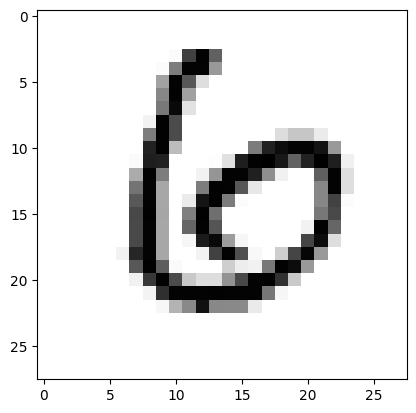

In [10]:
# predikcija
import matplotlib.pyplot as plt
%matplotlib inline

imgN = 11
img = x_test[imgN]
print(img.shape)
img = img.reshape(28,28)

plt.imshow(img, cmap="Greys")

In [11]:
tm = np.argmax(model.predict(x_test), axis=-1)
print(tm[imgN])



313/313 [==============================] - 1s 2ms/step
6


<BarContainer object of 10 artists>

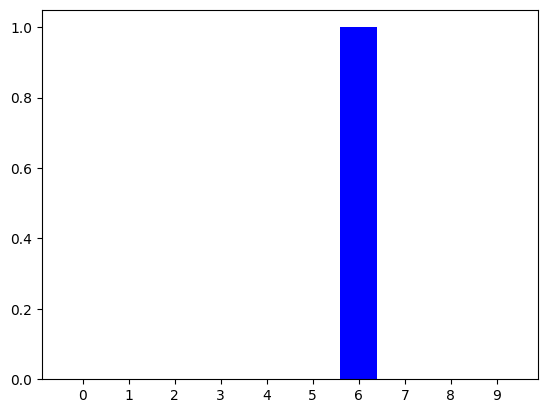

In [12]:
x0=list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xticks(x0)
y=t[11, :]
yt=list(y)
plt.bar(x0, yt, color="blue")